[Inspired by Medium Tutorial Here](https://medium.com/@shraddha.anala/binary-classification-model-australian-credit-approval-977ad7738411)

#### **Imports**

In [35]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

credit_approval_df = pd.read_csv("australian_credit_approval.csv")

#### **Data Pre-processing & Encoding**

<br/>
<br/>

**Why is Encoding necessary for certain columns?**

You might have noticed that we are only encoding certain categorical columns, and not everything. 

One Hot Encoding helps to maintain equal “weights” for all classes in a categorical variable, so one class is not thought of being more important than others. If there were many classes and we were to only use label encoding, the classes labelled with greater numbers might be perceived to be more valuable and we want to avoid it.

Columns which have binary values of 0 or 1, don't need further encoding.


In [31]:
X = credit_approval_df.iloc[:, :-1].values # Separate all feature values from target
y = credit_approval_df.iloc[:, -1].values  # Separate target values

ct = ColumnTransformer(transformers = [('one_hot_encoder', 
                       OneHotEncoder(categories = 'auto'),[3, 4, 5, 11])],
                       remainder = 'passthrough')

X = ct.fit_transform(X)

sc = StandardScaler()
X = sc.fit_transform(X)

#### **Plots**

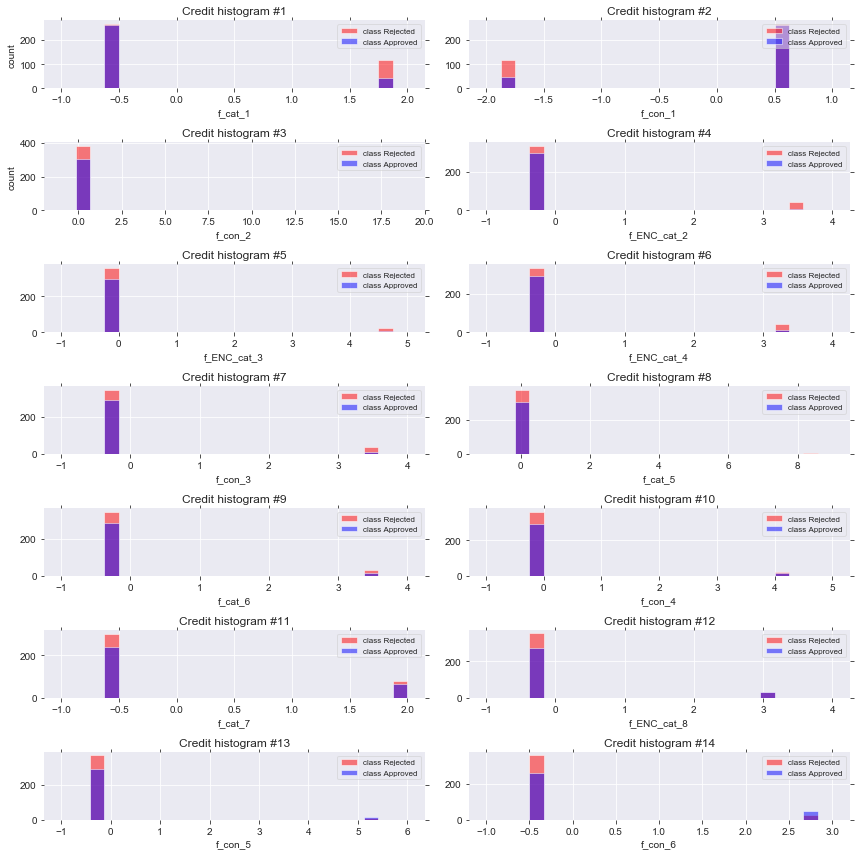

In [42]:
# Histograms for each of the columns
feature_dict = {i:label for i,label in zip(range(14), credit_approval_df.columns)}
label_dict = {0: 'Rejected', 1: 'Approved'}

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,12))

for ax,cnt in zip(axes.ravel(), range(14)):

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plotting the histograms
    for lab,col in zip(range(0,2), ('red', 'blue')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Credit histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()
plt.show()

The above code plots a histogram with each independent variable and the class label. This is to discern how well each individual variable can explain the separation of classes.

The histograms are [Each_Column] vs [Approval Decision]. If there was a subplot where the red class (rejected) & the blue class (approved) was separated nice enough, then all the red bars and the blue bars would have a nice distance between them. One side would be all red and the other all blue.


But that is not the case here. In fact, in many of the histograms, you can see a lot of purple in between the colours. Like purple at the bottom and red/blue at the top. This shows that the colours(and by logical extension, classes) are mixing, indicating a lack of clear separation between the classes.

Again, please keep in mind that one single variable is not able to account for good separation. But when all 14 variables are taken together, then the model does well in understanding which customer to approve credit for and whom to reject.

As can be seen, almost all variables by themselves do not account for the approval decision. This means that the target variable depends on a non-linear combination of all variables.

#### **Build Classifier & Evaluate Model Performance**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building Decision Tree Classifier Model
classifier = RandomForestClassifier(n_estimators = 170, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.8823701298701299

Standard Deviation within the accuracies:  0.04112600962367004

Accuracy:  0.8913043478260869


#### We thus have an **89.13%** accuracy of our model.

#### **Approval Rates**

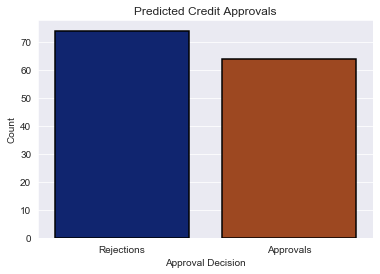

In [38]:
pred = list()

reject_count = approved_count = 0
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        pred.append('Rejections')
    else:
        pred.append('Approvals')

        
pred = pd.DataFrame(pred)
pred.columns = ['Decisions']


# Visualization of Decision Counts
plt.Figure(figsize = (8, 8))
sns.set_style('darkgrid')
sns.countplot(pred['Decisions'], data = pred, edgecolor = 'black', linewidth=1.5, palette = 'dark')
plt.title('Predicted Credit Approvals')
plt.xlabel('Approval Decision')
plt.ylabel('Count')
plt.show()